In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
# Load the datasets
customers = pd.read_csv('olist_customers_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
category_translation = pd.read_csv('product_category_name_translation.csv')

# Display the first few rows of each dataset to understand their structure
print(customers.head())
print(order_items.head())
print(order_payments.head())
print(order_reviews.head())
print(orders.head())
print(products.head())
print(sellers.head())
print(category_translation.head())

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3          

In [5]:
# Merge orders with customers to get customer details in each order
orders_customers = pd.merge(orders, customers, on='customer_id', how='inner')

# Merge the result with order_items to get product and seller information per order
orders_customers_items = pd.merge(orders_customers, order_items, on='order_id', how='inner')

# Display the first few rows of the merged dataset
print(orders_customers_items.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

In [6]:
# Merge products with category_translation to get English category names
products_translated = pd.merge(products, category_translation, on='product_category_name', how='inner')

# Display the first few rows of the translated products dataset
print(products_translated.head())

                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0              14.0   
1            1000.0     

In [7]:
# Merge the orders_customers_items with products_translated to get the final dataset
final_dataset = pd.merge(orders_customers_items, products_translated, on='product_id', how='inner')

# Display the first few rows of the final merged dataset
print(final_dataset.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

# Insights and Visualization

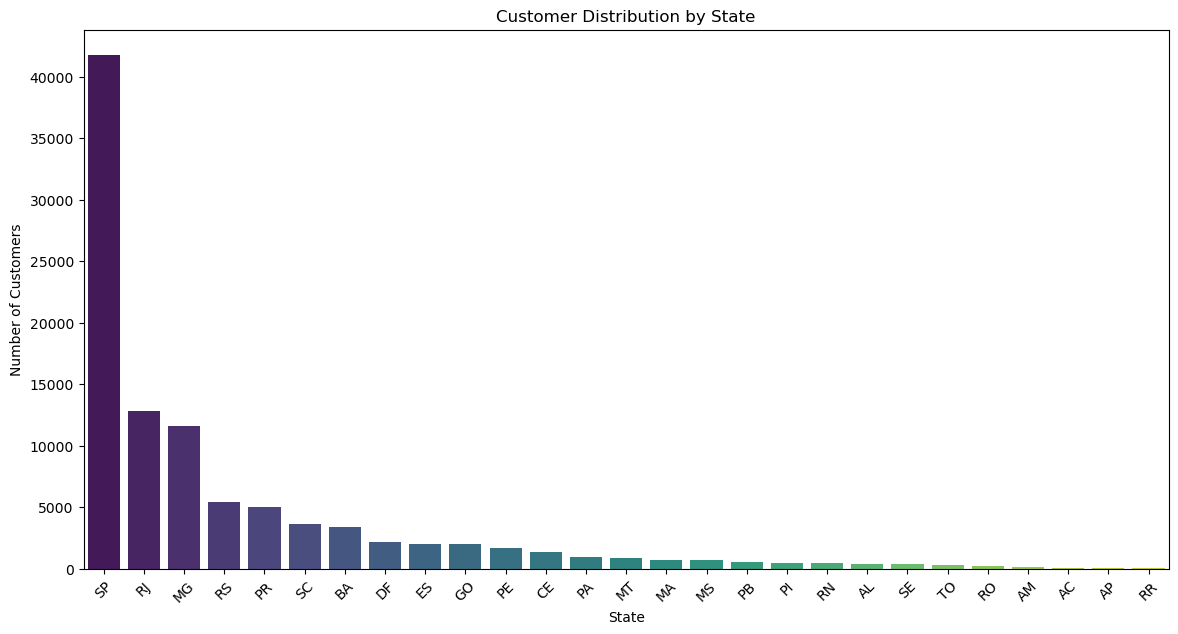

In [8]:
# Customer distribution by state
customer_state_distribution = customers['customer_state'].value_counts().reset_index()
customer_state_distribution.columns = ['State', 'Number of Customers']

# Plot
plt.figure(figsize=(14, 7))
sns.barplot(x='State', y='Number of Customers', data=customer_state_distribution, palette='viridis')
plt.title('Customer Distribution by State')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

### Customer Distribution: The majority of customers might be concentrated in specific states, helping target regional promotions.

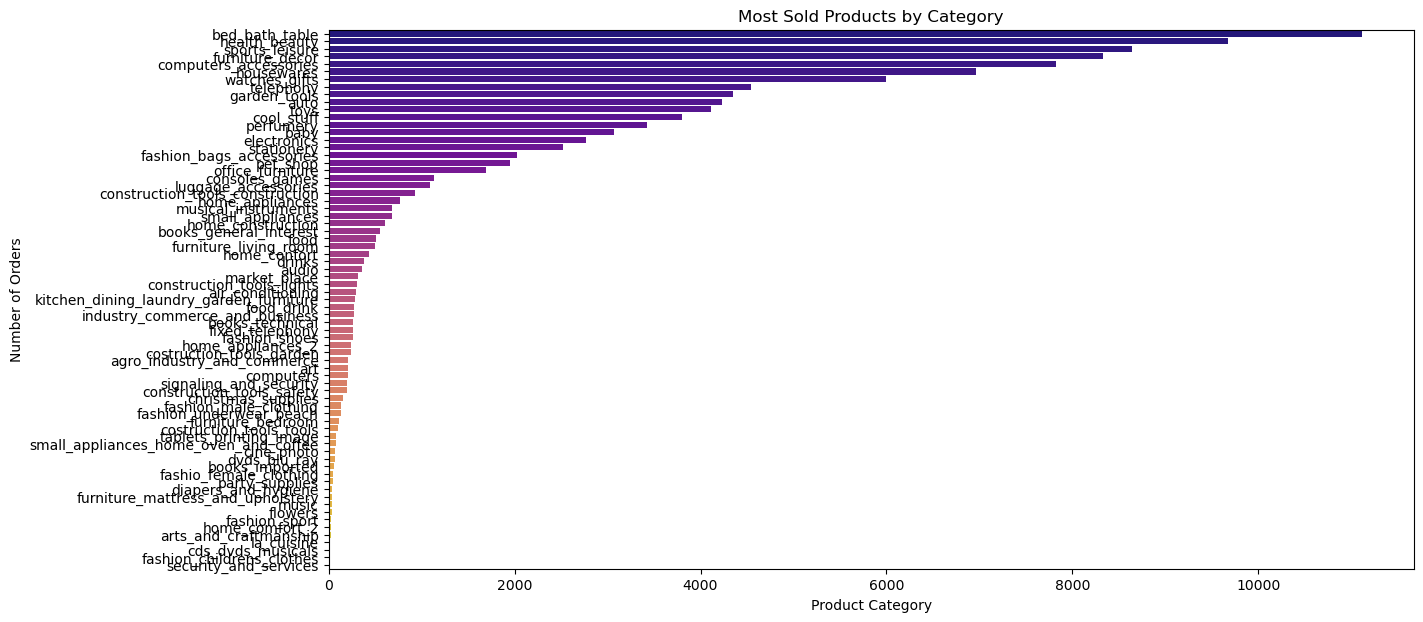

In [9]:
# Most sold products by category
product_sales = final_dataset.groupby('product_category_name_english').agg({'order_item_id': 'count'}).reset_index()
product_sales.columns = ['Product Category', 'Number of Orders']
product_sales = product_sales.sort_values(by='Number of Orders', ascending=False)

# Plot
plt.figure(figsize=(14, 7))
sns.barplot(x='Number of Orders', y='Product Category', data=product_sales, palette='plasma')
plt.title('Most Sold Products by Category')
plt.ylabel('Number of Orders')
plt.xlabel('Product Category')
plt.show()

### Top Selling Categories: Certain product categories are more popular, guiding inventory and marketing strategies

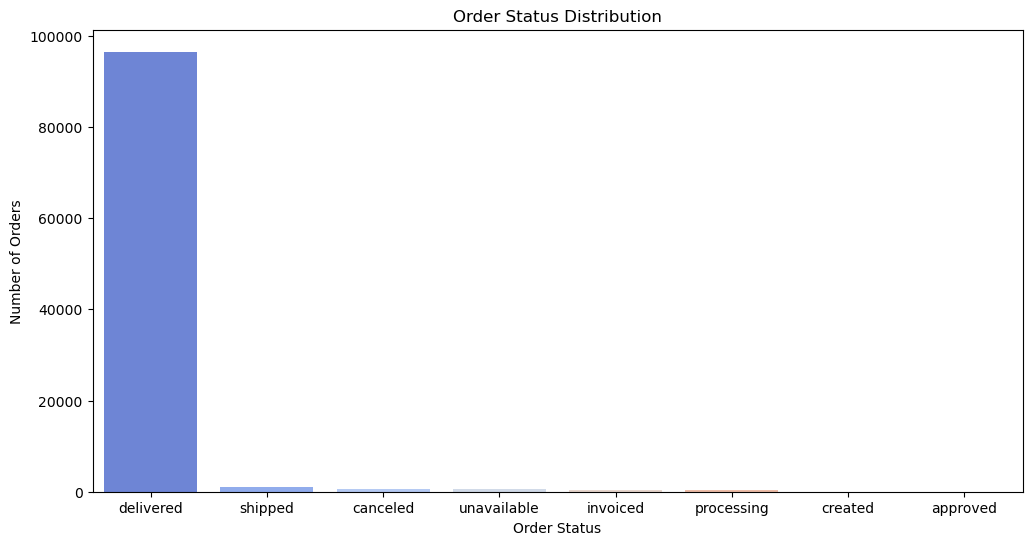

In [10]:
# Order status distribution
order_status_distribution = orders['order_status'].value_counts().reset_index()
order_status_distribution.columns = ['Order Status', 'Number of Orders']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Status', y='Number of Orders', data=order_status_distribution, palette='coolwarm')
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.show()

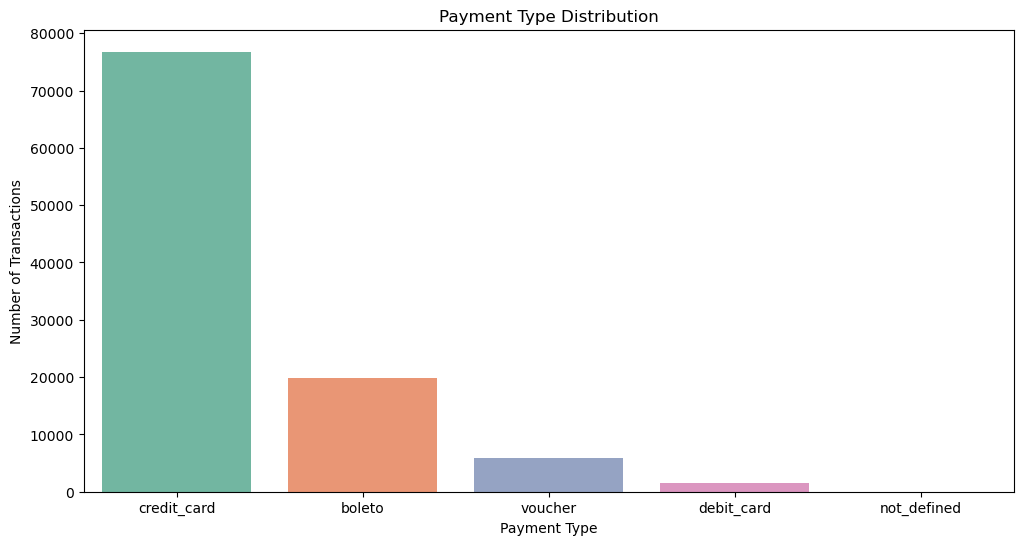

In [11]:
# Payment type distribution
payment_type_distribution = order_payments['payment_type'].value_counts().reset_index()
payment_type_distribution.columns = ['Payment Type', 'Number of Transactions']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Payment Type', y='Number of Transactions', data=payment_type_distribution, palette='Set2')
plt.title('Payment Type Distribution')
plt.xlabel('Payment Type')
plt.ylabel('Number of Transactions')
plt.show()

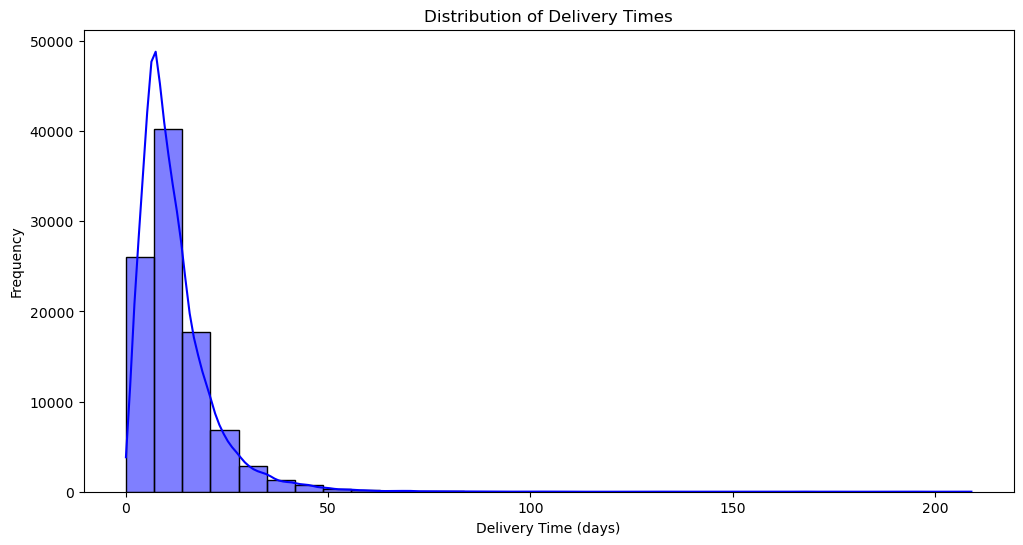

In [12]:
# Calculate delivery time in days
orders['delivery_time'] = (pd.to_datetime(orders['order_delivered_customer_date']) - pd.to_datetime(orders['order_purchase_timestamp'])).dt.days

# Distribution of delivery times
plt.figure(figsize=(12, 6))
sns.histplot(orders['delivery_time'], bins=30, kde=True, color='blue')
plt.title('Distribution of Delivery Times')
plt.xlabel('Delivery Time (days)')
plt.ylabel('Frequency')
plt.show()

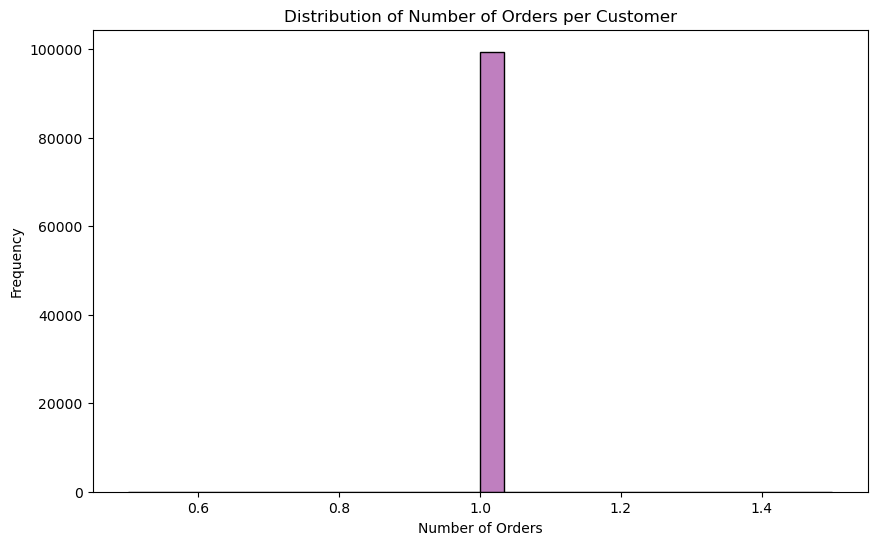

In [13]:
# Calculate the number of orders per customer
orders_per_customer = orders.groupby('customer_id')['order_id'].nunique().reset_index()
orders_per_customer.columns = ['Customer ID', 'Number of Orders']

# Plot the distribution of the number of orders
plt.figure(figsize=(10, 6))
sns.histplot(orders_per_customer['Number of Orders'], bins=30, kde=True, color='purple')
plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show()

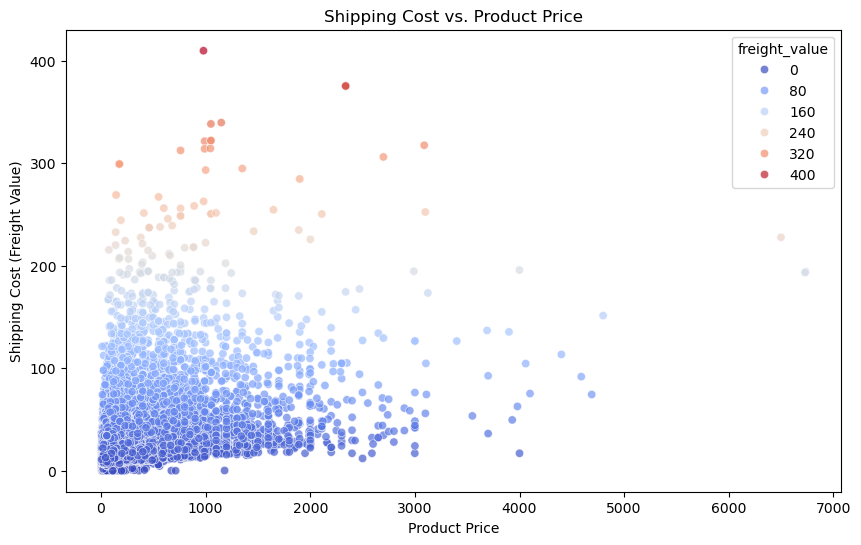

In [14]:
# Scatter plot to visualize shipping cost vs. product price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=order_items['price'], y=order_items['freight_value'], hue=order_items['freight_value'], palette='coolwarm', alpha=0.7)
plt.title('Shipping Cost vs. Product Price')
plt.xlabel('Product Price')
plt.ylabel('Shipping Cost (Freight Value)')
plt.show()

### This scatter plot can reveal if there’s a correlation between product price and shipping cost, and identify outliers where shipping might be disproportionately high.

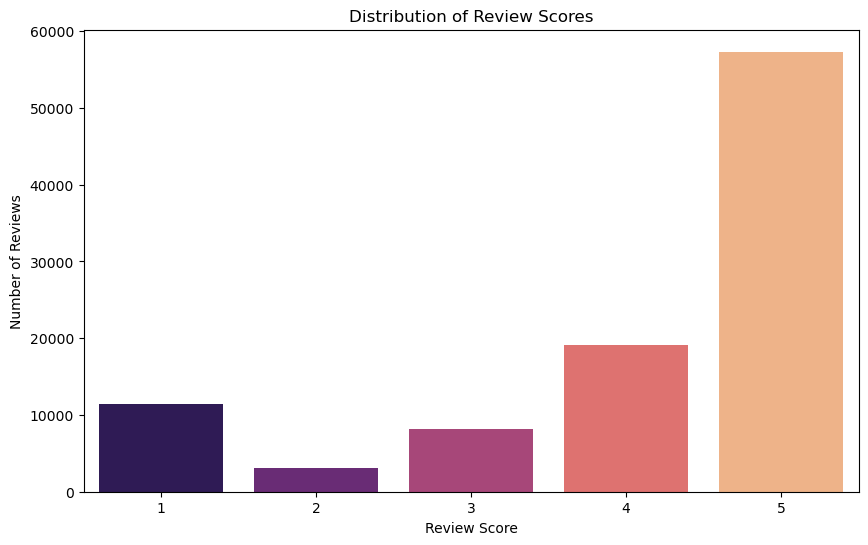

In [15]:
# Distribution of review scores
plt.figure(figsize=(10, 6))
sns.countplot(x=order_reviews['review_score'], palette='magma')
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Number of Reviews')
plt.show()

### This plot shows the general customer satisfaction level, indicating areas for improvement if the lower scores dominate.


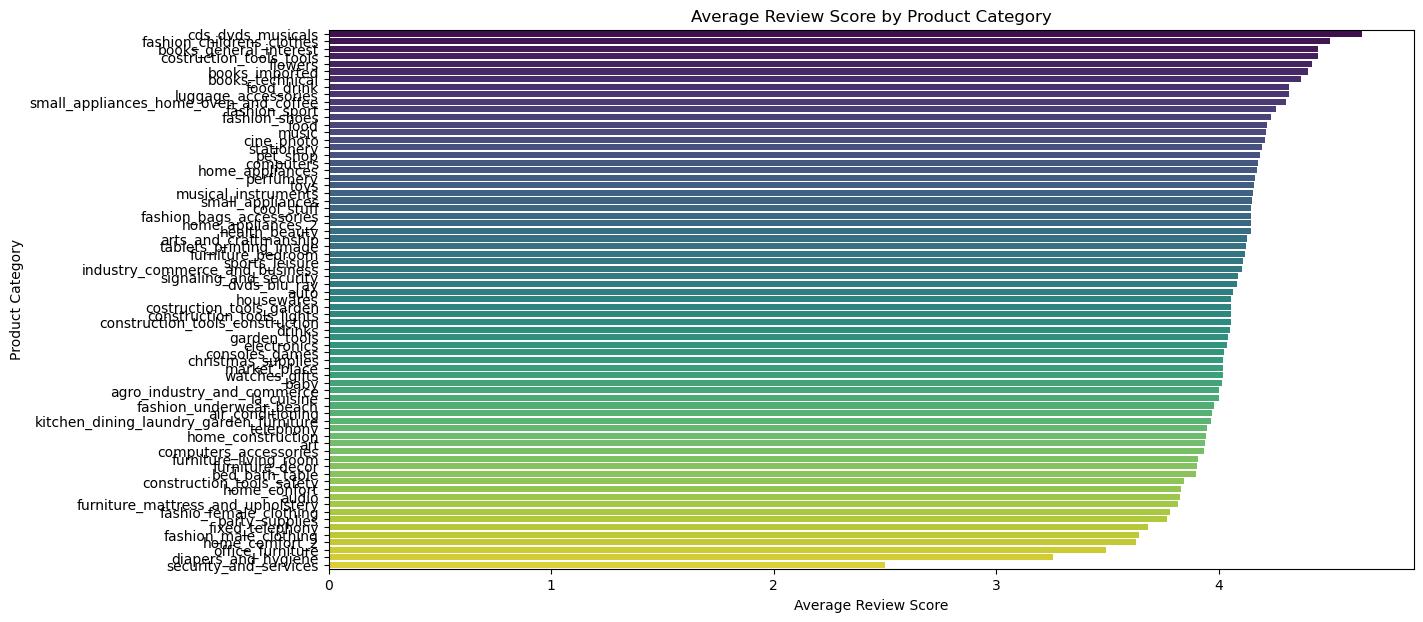

In [16]:
# Merge review scores with product categories
reviews_with_categories = pd.merge(order_reviews, order_items[['order_id', 'product_id']], on='order_id', how='inner')
reviews_with_categories = pd.merge(reviews_with_categories, products_translated[['product_id', 'product_category_name_english']], on='product_id', how='inner')

# Calculate the average review score per product category
avg_review_score = reviews_with_categories.groupby('product_category_name_english')['review_score'].mean().reset_index()
avg_review_score = avg_review_score.sort_values(by='review_score', ascending=False)

# Plot the average review score by product category
plt.figure(figsize=(14, 7))
sns.barplot(x='review_score', y='product_category_name_english', data=avg_review_score, palette='viridis')
plt.title('Average Review Score by Product Category')
plt.xlabel('Average Review Score')
plt.ylabel('Product Category')
plt.show()

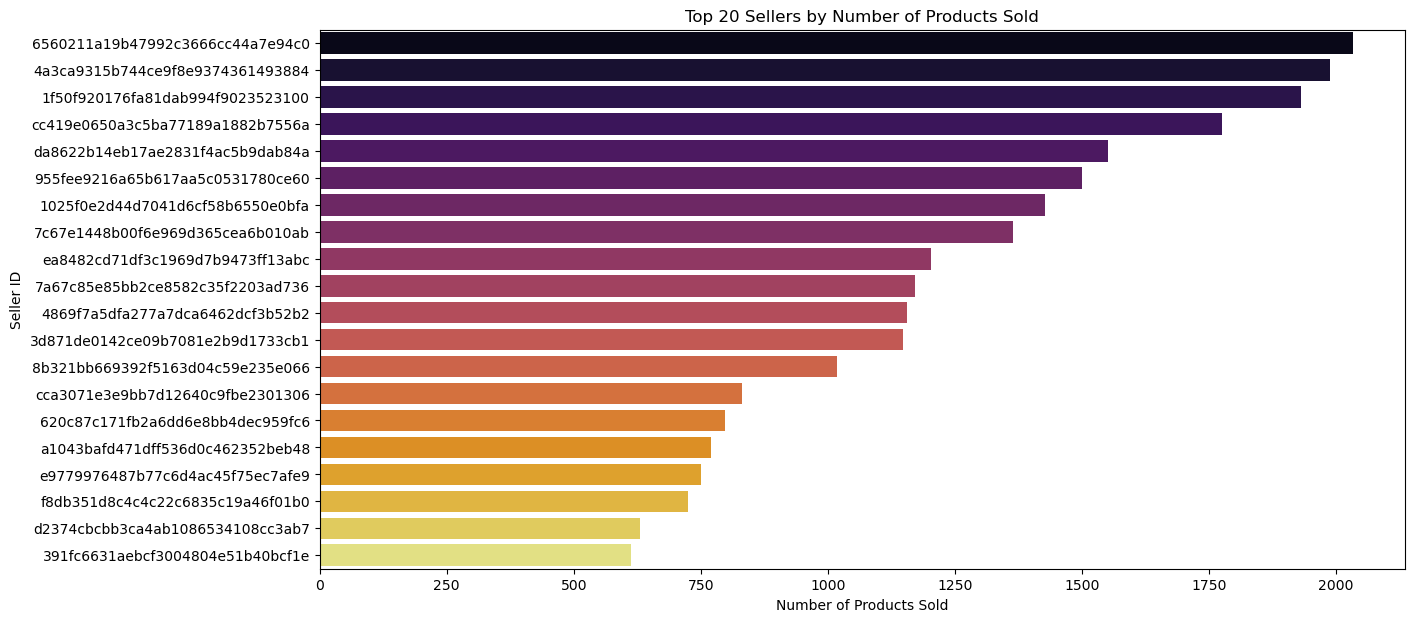

In [17]:
# Calculate the number of products sold per seller
products_per_seller = order_items.groupby('seller_id')['order_item_id'].count().reset_index()
products_per_seller.columns = ['Seller ID', 'Number of Products Sold']

# Plot the top 20 sellers by number of products sold
top_sellers = products_per_seller.sort_values(by='Number of Products Sold', ascending=False).head(20)

plt.figure(figsize=(14, 7))
sns.barplot(x='Number of Products Sold', y='Seller ID', data=top_sellers, palette='inferno')
plt.title('Top 20 Sellers by Number of Products Sold')
plt.xlabel('Number of Products Sold')
plt.ylabel('Seller ID')
plt.show()

### This plot identifies the top-performing sellers, which can be beneficial for partnership or inventory strategies.

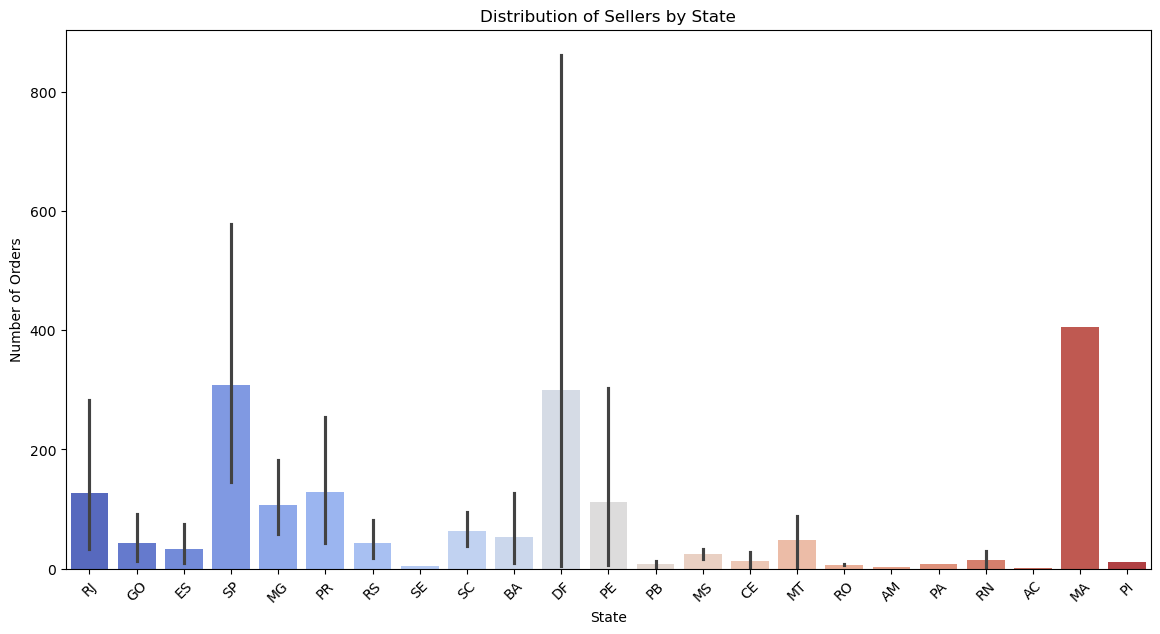

In [18]:
# Merge sellers with their locations
sellers_location = pd.merge(sellers, order_items[['seller_id', 'order_item_id']], on='seller_id', how='inner')
sellers_location = sellers_location.groupby(['seller_city', 'seller_state']).agg({'order_item_id': 'count'}).reset_index()
sellers_location.columns = ['Seller City', 'Seller State', 'Number of Orders']

# Plot geographical distribution of sellers by state
plt.figure(figsize=(14, 7))
sns.barplot(x='Seller State', y='Number of Orders', data=sellers_location, palette='coolwarm')
plt.title('Distribution of Sellers by State')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

### Understand which states or cities have the most active sellers, potentially guiding logistics and expansion strategies.

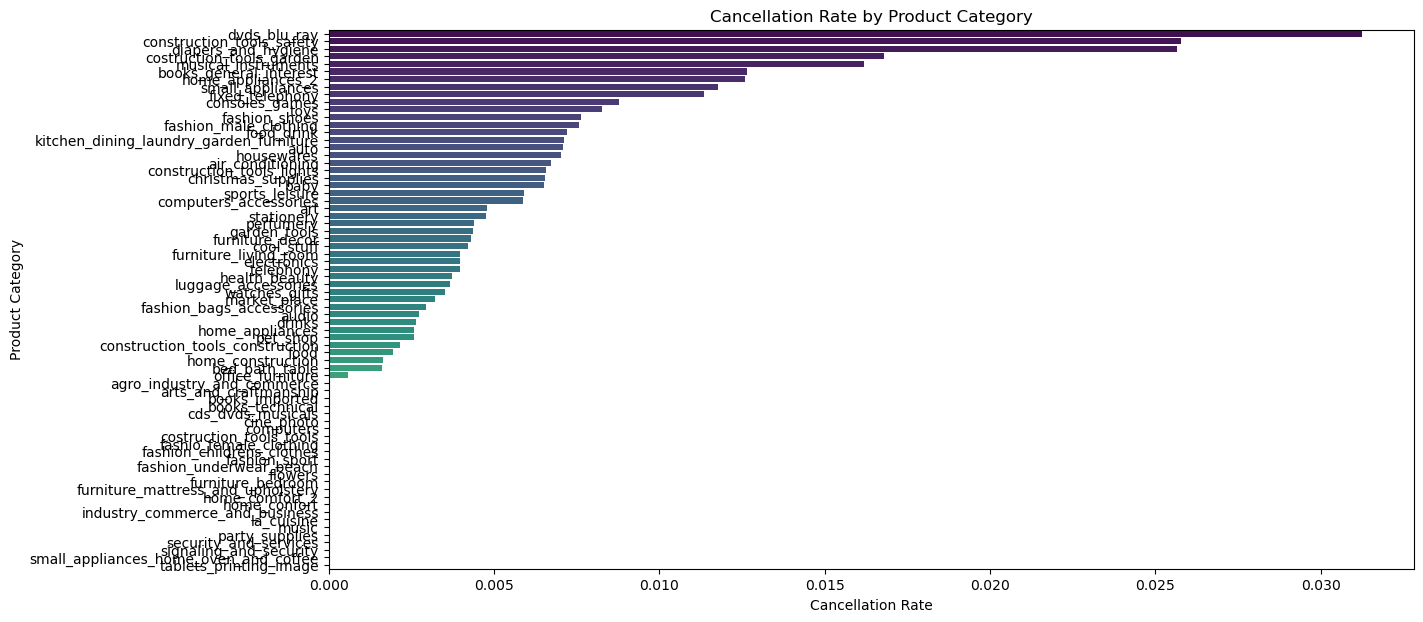

In [21]:
# Calculate the cancellation rate by product category
cancelled_orders = orders[orders['order_status'] == 'canceled']
cancelled_items = pd.merge(cancelled_orders, order_items, on='order_id', how='inner')
cancelled_items = pd.merge(cancelled_items, products_translated, on='product_id', how='inner')

cancellation_rate = cancelled_items.groupby('product_category_name_english')['order_item_id'].count() / final_dataset.groupby('product_category_name_english')['order_item_id'].count()
cancellation_rate = cancellation_rate.reset_index()
cancellation_rate.columns = ['Product Category', 'Cancellation Rate']
cancellation_rate = cancellation_rate.sort_values(by='Cancellation Rate', ascending=False)

# Plot the cancellation rate by product category
plt.figure(figsize=(14, 7))
sns.barplot(x='Cancellation Rate', y='Product Category', data=cancellation_rate, palette='viridis')
plt.title('Cancellation Rate by Product Category')
plt.xlabel('Cancellation Rate')
plt.ylabel('Product Category')
plt.show()

### Highlight categories with higher cancellation rates, which might require further investigation into product quality or customer expectations.